Imports

In [594]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

Read data

In [595]:
wine_quality = pd.read_csv('data/winequality-red.csv')

In [596]:
wine_quality.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking data types

In [597]:
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Checking for NaN values

In [598]:
wine_quality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Checking correlations between different variables and the quality of the wine

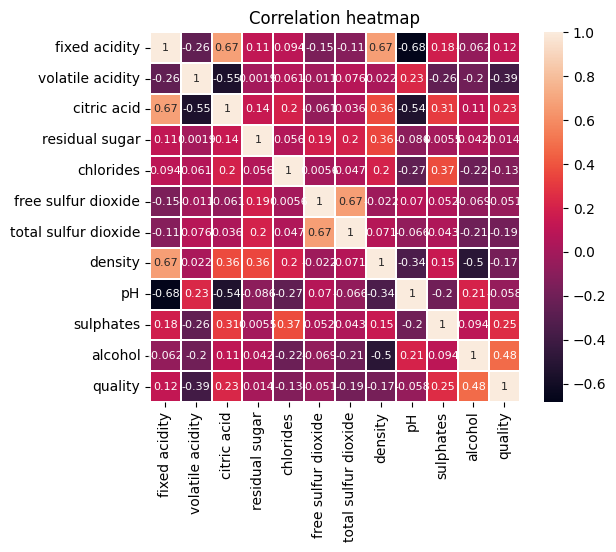

In [599]:
qual_corr = wine_quality.corr()
sns.heatmap(qual_corr, linewidths = 0.1, vmax = 1, square = True, annot = True, annot_kws={"size":8})
plt.title('Correlation heatmap')
plt.show()

From the heat map above, the highest linear correlation between quality and any other variable is quality and alcohol.

scatter plot with line of best fit for quality of alcohol and alcohol

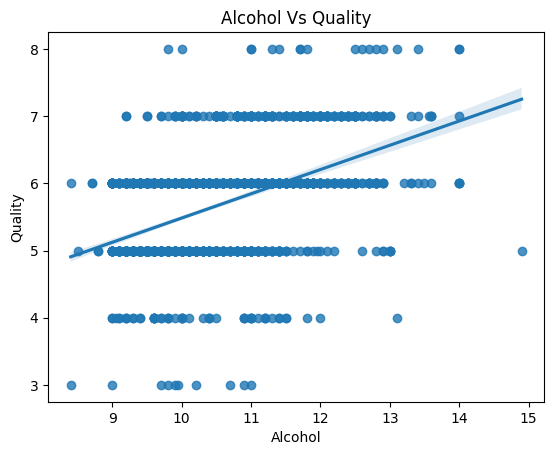

In [600]:
sns.regplot(x = 'alcohol', y = 'quality', data = wine_quality)
plt.title('Alcohol Vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

Splitting response variable and explanatory variable

In [601]:
y = wine_quality[['quality']]

y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [602]:
X = wine_quality.loc[:, ~wine_quality.columns.isin(['quality'])]


X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

Creating and fitting the model (decision tree classifier)

In [604]:
DTC = DecisionTreeClassifier()
DTC = DecisionTreeRegressor()
DTC.fit(X_train, y_train)

DecisionTreeRegressor()

Creating training prediction data

In [605]:
prediction_training = DTC.predict(X_train)

Calculating different metrics of accuracy with training data

In [606]:
conf_matrix = confusion_matrix(y_train, prediction_training)
print(conf_matrix)

[[  8   0   0   0   0   0]
 [  0  45   0   0   0   0]
 [  0   0 548   0   0   0]
 [  0   0   0 506   0   0]
 [  0   0   0   0 159   0]
 [  0   0   0   0   0  13]]


In [607]:
accuracy = accuracy_score(y_train, prediction_training)
score = f1_score(y_train, prediction_training, average = 'weighted')
recall = recall_score(y_train, prediction_training, average = 'weighted')
precision = precision_score(y_train, prediction_training, average = 'weighted')

print('Accuracy:', accuracy)
print('f1 score:', score)
print('recall score:', recall)
print('precision score:', precision)

Accuracy: 1.0
f1 score: 1.0
recall score: 1.0
precision score: 1.0


Test Predictions

In [608]:
prediction_test = DTC.predict(X_test)

Different metrics of accuracy of predicted test data

In [609]:
conf_matrix = confusion_matrix(y_test, prediction_test)
print(conf_matrix)

[[ 0  2  0  0  0  0]
 [ 1  3  2  1  1  0]
 [ 0 11 84 34  4  0]
 [ 0  5 27 86 12  2]
 [ 0  1  4 14 20  1]
 [ 0  0  0  3  1  1]]


In [610]:
test_accuracy = accuracy_score(y_test, prediction_test)
test_f1_score = f1_score(y_test, prediction_test, average = 'weighted')
test_recall_score = recall_score(y_test, prediction_test, average = 'weighted')
test_precision_score = precision_score(y_test, prediction_test, average = 'weighted')

print('Accuracy:', test_accuracy)
print('f1 score:', test_f1_score)
print('recall score:', test_recall_score)
print('precision score:', test_precision_score)

Accuracy: 0.60625
f1 score: 0.6146525641025642
recall score: 0.60625
precision score: 0.6285674678820417


Decision Tree Regression Model with a 60% accuracy to predict alcohol quality